# HDFS Log Data Exploration
**Date:** February 18, 2026  
**Purpose:** Explore HDFS logs and analyze incident grouping for Milestone Demo I

---

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

/Users/parthkheni/anaconda3/lib/python3.11/site-packages/pandas/core/computation/expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.8.4' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/parthkheni/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:56: UserWarning: Pandas requires version '1.4.2' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 1. Load Parsed Logs
First, let's load the parsed HDFS logs from JSON.

In [2]:
# Load parsed logs
with open('../data/parsed_logs_1000.json', 'r') as f:
    logs = json.load(f)

print(f"Loaded {len(logs)} parsed log entries")

# Convert to DataFrame for easier analysis
df_logs = pd.DataFrame(logs)
df_logs['timestamp'] = pd.to_datetime(df_logs['timestamp'])

df_logs.head()

Loaded 1000 parsed log entries


,line_number,timestamp,thread_id,level,component,message,block_id,raw_line
0,1,2008-11-09 20:35:18,143,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-1608999687919862906 src: ...,blk_-1608999687919862906,081109 203518 143 INFO dfs.DataNode$DataXceive...
1,2,2008-11-09 20:35:18,35,INFO,dfs.FSNamesystem,BLOCK* NameSystem.allocateBlock: /mnt/hadoop/m...,blk_-1608999687919862906,081109 203518 35 INFO dfs.FSNamesystem: BLOCK*...
2,3,2008-11-09 20:35:19,143,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-1608999687919862906 src: ...,blk_-1608999687919862906,081109 203519 143 INFO dfs.DataNode$DataXceive...
3,4,2008-11-09 20:35:19,145,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-1608999687919862906 src: ...,blk_-1608999687919862906,081109 203519 145 INFO dfs.DataNode$DataXceive...
4,5,2008-11-09 20:35:19,145,INFO,dfs.DataNode$PacketResponder,PacketResponder 1 for block blk_-1608999687919...,blk_-1608999687919862906,081109 203519 145 INFO dfs.DataNode$PacketResp...


## 2. Log Structure Analysis
Let's examine the structure and characteristics of the logs.

In [3]:
# Basic statistics
print("Dataset Overview:")
print(f"  Total logs: {len(df_logs)}")
print(f"  Time range: {df_logs['timestamp'].min()} to {df_logs['timestamp'].max()}")
print(f"  Duration: {(df_logs['timestamp'].max() - df_logs['timestamp'].min())}")
print(f"  Logs with block IDs: {df_logs['block_id'].notna().sum()} ({df_logs['block_id'].notna().sum()/len(df_logs)*100:.1f}%)")
print(f"  Unique block IDs: {df_logs['block_id'].nunique()}")
print(f"  Unique components: {df_logs['component'].nunique()}")

Dataset Overview:
  Total logs: 1000
  Time range: 2008-11-09 20:35:18 to 2008-11-09 20:35:35
  Duration: 0 days 00:00:17
  Logs with block IDs: 1000 (100.0%)
  Unique block IDs: 196
  Unique components: 5



Log Level Distribution:
level
INFO    1000
Name: count, dtype: int64


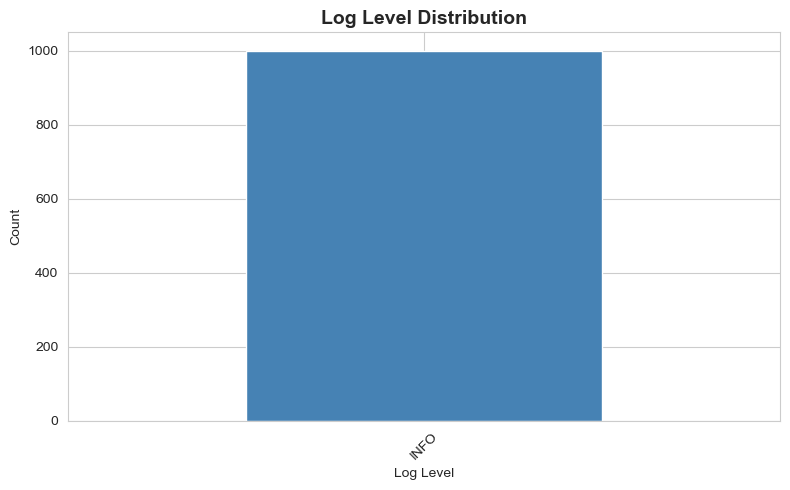

In [4]:
# Log level distribution
print("\nLog Level Distribution:")
level_counts = df_logs['level'].value_counts()
print(level_counts)

# Plot
plt.figure(figsize=(8, 5))
level_counts.plot(kind='bar', color='steelblue')
plt.title('Log Level Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Components:
component
dfs.DataNode$DataXceiver        768
dfs.FSNamesystem                200
dfs.DataNode$PacketResponder     24
dfs.DataNode$DataTransfer         4
dfs.DataNode                      4
Name: count, dtype: int64


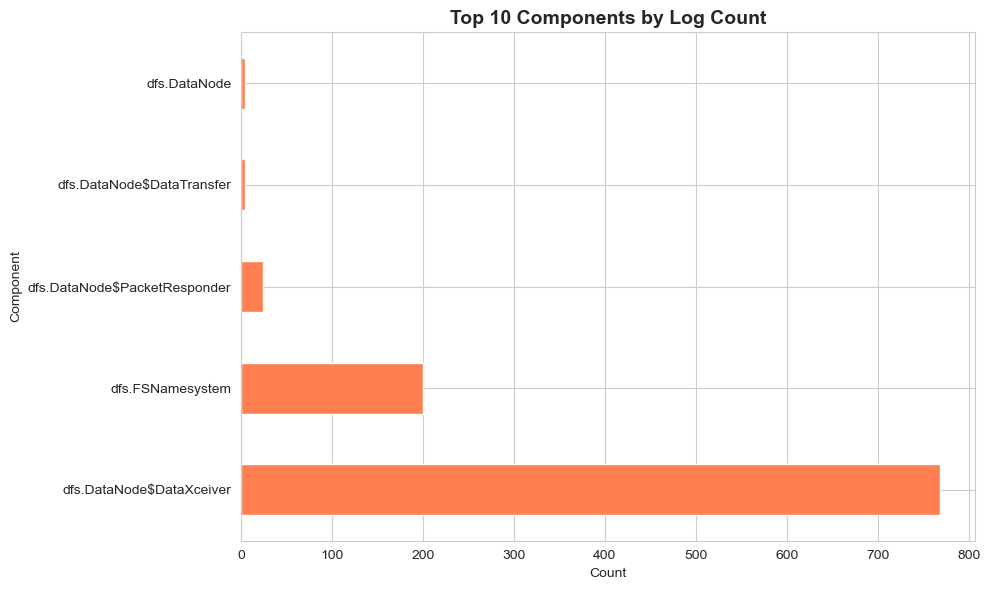

In [5]:
# Component distribution (top 10)
print("\nTop 10 Components:")
component_counts = df_logs['component'].value_counts().head(10)
print(component_counts)

# Plot
plt.figure(figsize=(10, 6))
component_counts.plot(kind='barh', color='coral')
plt.title('Top 10 Components by Log Count', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Component')
plt.tight_layout()
plt.show()

## 3. Sample Log Messages
Let's look at some example log messages to understand the data.

In [6]:
# Show sample logs
print("Sample Log Messages:\n")
for i, log in enumerate(df_logs.head(5).to_dict('records'), 1):
    print(f"{i}. [{log['level']}] {log['component']}")
    print(f"   Block: {log['block_id'] or 'N/A'}")
    print(f"   Message: {log['message'][:100]}...")
    print()

Sample Log Messages:

1. [INFO] dfs.DataNode$DataXceiver
   Block: blk_-1608999687919862906
   Message: Receiving block blk_-1608999687919862906 src: /10.250.19.102:54106 dest: /10.250.19.102:50010...

2. [INFO] dfs.FSNamesystem
   Block: blk_-1608999687919862906
   Message: BLOCK* NameSystem.allocateBlock: /mnt/hadoop/mapred/system/job_200811092030_0001/job.jar. blk_-16089...

3. [INFO] dfs.DataNode$DataXceiver
   Block: blk_-1608999687919862906
   Message: Receiving block blk_-1608999687919862906 src: /10.250.10.6:40524 dest: /10.250.10.6:50010...

4. [INFO] dfs.DataNode$DataXceiver
   Block: blk_-1608999687919862906
   Message: Receiving block blk_-1608999687919862906 src: /10.250.14.224:42420 dest: /10.250.14.224:50010...

5. [INFO] dfs.DataNode$PacketResponder
   Block: blk_-1608999687919862906
   Message: PacketResponder 1 for block blk_-1608999687919862906 terminating...



## 4. Load Incidents
Now let's load the grouped incidents and analyze them.

In [10]:
# Load incidents
with open('../data/incidents_1018.json', 'r') as f:  # Adjust filename
    incidents = json.load(f)

print(f"Loaded {len(incidents)} incidents")

# Create DataFrame (without the full logs)
incidents_summary = [{
    'incident_id': inc['incident_id'],
    'block_id': inc['block_id'],
    'start_time': inc['start_time'],
    'duration_seconds': inc['duration_seconds'],
    'num_logs': inc['num_logs'],
    'severity': inc['severity'],
    'num_components': len(inc['components'])
} for inc in incidents]

df_incidents = pd.DataFrame(incidents_summary)
df_incidents['start_time'] = pd.to_datetime(df_incidents['start_time'])

df_incidents.head(10)

Loaded 1018 incidents


,incident_id,block_id,start_time,duration_seconds,num_logs,severity,num_components
0,1,blk_-1608999687919862906,2008-11-09 20:35:18,68.0,249,INFO,5
1,2,blk_7503483334202473044,2008-11-09 20:35:20,5.0,14,INFO,3
2,3,blk_-3544583377289625738,2008-11-09 20:35:21,55.0,216,INFO,3
3,4,blk_-9073992586687739851,2008-11-09 20:35:23,29.0,14,INFO,4
4,5,blk_7854771516489510256,2008-11-09 20:35:29,49.0,13,INFO,3
5,6,blk_1717858812220360316,2008-11-09 20:35:30,55.0,13,INFO,3
6,7,blk_-2519617320378473615,2008-11-09 20:35:30,54.0,13,INFO,3
7,8,blk_7063315473424667801,2008-11-09 20:35:30,60.0,13,INFO,3
8,9,blk_8586544123689943463,2008-11-09 20:35:30,39.0,13,INFO,3
9,10,blk_2765344736980045501,2008-11-09 20:35:30,30.0,13,INFO,3


## 5. Incident Statistics

Incident Size Statistics:
count    1018.000000
mean        9.823183
std        10.856269
min         1.000000
25%         4.000000
50%        13.000000
75%        13.000000
max       249.000000
Name: num_logs, dtype: float64


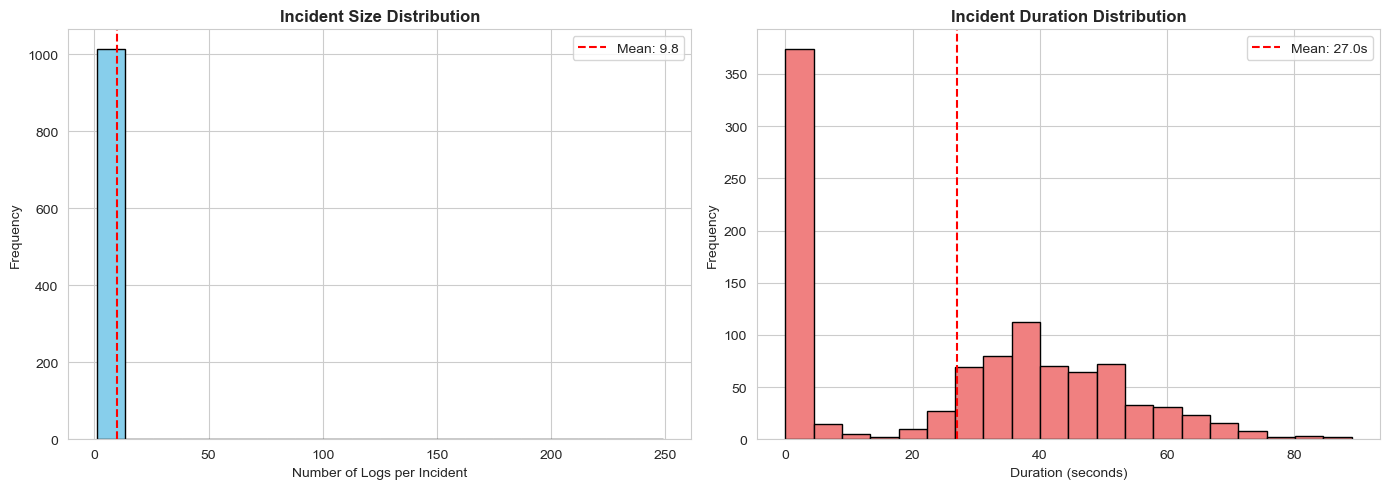

In [11]:
# Incident size distribution
print("Incident Size Statistics:")
print(df_incidents['num_logs'].describe())

# Plot distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_incidents['num_logs'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Incident Size Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Logs per Incident')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df_incidents['num_logs'].mean(), color='red', linestyle='--', label=f'Mean: {df_incidents["num_logs"].mean():.1f}')
axes[0].legend()

# Duration distribution
axes[1].hist(df_incidents['duration_seconds'], bins=20, color='lightcoral', edgecolor='black')
axes[1].set_title('Incident Duration Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Duration (seconds)')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df_incidents['duration_seconds'].mean(), color='red', linestyle='--', label=f'Mean: {df_incidents["duration_seconds"].mean():.1f}s')
axes[1].legend()

plt.tight_layout()
plt.show()


Severity Distribution:
severity
INFO    1018
Name: count, dtype: int64


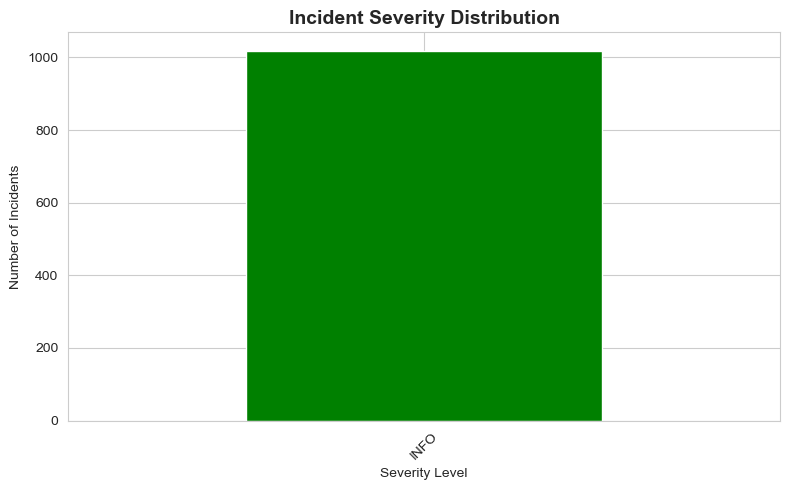

In [12]:
# Severity distribution
print("\nSeverity Distribution:")
severity_counts = df_incidents['severity'].value_counts()
print(severity_counts)

# Plot
plt.figure(figsize=(8, 5))
severity_counts.plot(kind='bar', color=['red' if x=='ERROR' else 'orange' if x=='WARN' else 'green' for x in severity_counts.index])
plt.title('Incident Severity Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Severity Level')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Failure Type Analysis
Let's identify common failure patterns in the incidents.

Common Failure Types:
  exception: 1 incidents
  timeout: 1 incidents


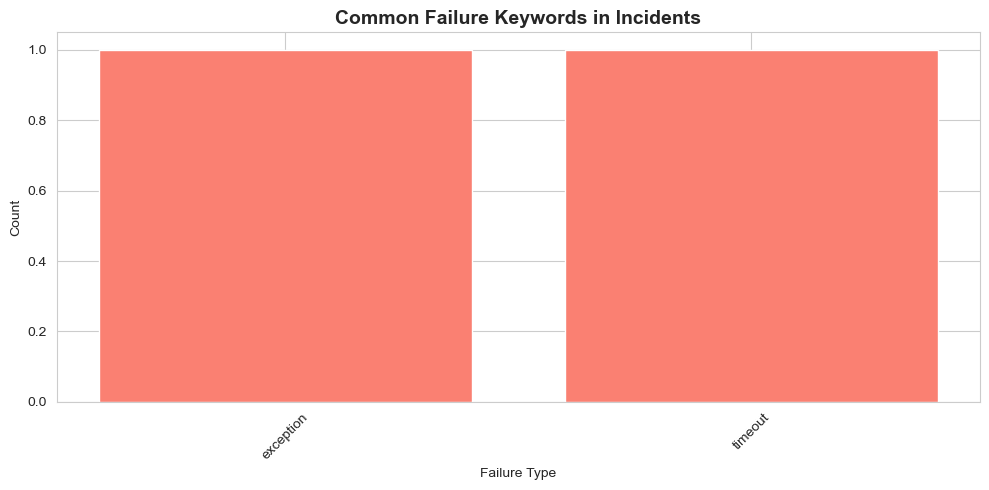

In [13]:
# Extract failure types from incident messages
failure_keywords = ['corrupt', 'error', 'fail', 'exception', 'timeout', 'unable', 'lost', 'disconnect']

failure_types = []
for incident in incidents:
    messages = ' '.join([log['message'].lower() for log in incident['logs']])
    found_types = [kw for kw in failure_keywords if kw in messages]
    failure_types.extend(found_types)

failure_counts = Counter(failure_types)
print("Common Failure Types:")
for failure, count in failure_counts.most_common(10):
    print(f"  {failure}: {count} incidents")

# Plot
if failure_counts:
    plt.figure(figsize=(10, 5))
    failures_df = pd.DataFrame(failure_counts.most_common(10), columns=['Failure Type', 'Count'])
    plt.bar(failures_df['Failure Type'], failures_df['Count'], color='salmon')
    plt.title('Common Failure Keywords in Incidents', fontsize=14, fontweight='bold')
    plt.xlabel('Failure Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 7. Sample Incident Deep Dive
Let's examine one incident in detail to understand the data.

In [14]:
# Pick a moderately-sized incident
sample_incident = sorted(incidents, key=lambda x: x['num_logs'])[len(incidents)//2]

print(f"Sample Incident #{sample_incident['incident_id']}")
print(f"  Block ID: {sample_incident['block_id']}")
print(f"  Time: {sample_incident['start_time']} (duration: {sample_incident['duration_seconds']:.1f}s)")
print(f"  Severity: {sample_incident['severity']}")
print(f"  Number of logs: {sample_incident['num_logs']}")
print(f"  Components: {', '.join(sample_incident['components'])}")
print(f"\nLog messages:")

for i, log in enumerate(sample_incident['logs'][:5], 1):  # Show first 5
    print(f"  {i}. [{log['level']}] {log['message'][:80]}...")

if sample_incident['num_logs'] > 5:
    print(f"  ... and {sample_incident['num_logs'] - 5} more logs")

Sample Incident #102
  Block ID: blk_-4390409968877773039
  Time: 2008-11-09T20:35:33 (duration: 37.0s)
  Severity: INFO
  Number of logs: 13
  Components: dfs.DataNode$PacketResponder, dfs.FSNamesystem, dfs.DataNode$DataXceiver

Log messages:
  1. [INFO] Receiving block blk_-4390409968877773039 src: /10.251.42.84:33071 dest: /10.251....
  2. [INFO] BLOCK* NameSystem.allocateBlock: /user/root/rand/_temporary/_task_200811092030_0...
  3. [INFO] Receiving block blk_-4390409968877773039 src: /10.251.74.134:45747 dest: /10.251...
  4. [INFO] Receiving block blk_-4390409968877773039 src: /10.251.42.84:58385 dest: /10.251....
  5. [INFO] PacketResponder 0 for block blk_-4390409968877773039 terminating...
  ... and 8 more logs


## 8. Key Insights for Demo

**Summary Statistics:**
- Total logs processed: [fill from above]
- Incidents created: [fill from above]
- Average logs per incident: [fill from above]
- Most common failure types: [fill from above]

**Next Steps:**
1. Generate LLM summaries for these incidents (Philip)
2. Create embeddings for similarity search (Beau)
3. Prepare demo notebook showing full pipeline (Beau)
4. Finalize demo slides (Parth)

---